In [110]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt

In [111]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [112]:
df.shape

(400, 5)

In [113]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [114]:
df=df.drop(['User ID'],axis=1)


In [115]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [116]:
df.dtypes   #convert the obj type to int

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [117]:
df=pd.get_dummies(df, columns=['Gender'])

In [118]:
df.head()

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1


In [119]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
Gender_Female      0
Gender_Male        0
dtype: int64

In [120]:
#split into train test

In [121]:
X=df.drop(['Purchased'],axis=1)
y=df['Purchased']

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [123]:
neighbours=np.arange(1,9)
test_acc=np.empty(len(neighbours))
train_acc=np.empty(len(neighbours))

In [124]:
for i,k in enumerate(neighbours):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_acc[i]=knn.score(X_train,y_train)
    test_acc[i]=knn.score(X_test,y_test)

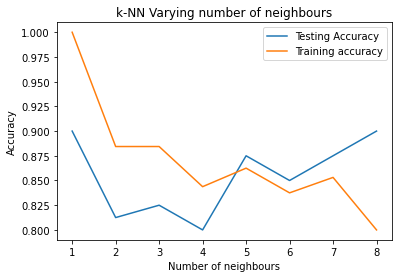

In [125]:

plt.title('k-NN Varying number of neighbours')
plt.plot(neighbours, test_acc, label='Testing Accuracy')
plt.plot(neighbours, train_acc, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbours')
plt.ylabel('Accuracy')
plt.show()

In [130]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
accuracy_score(y_test,pred)

0.875